<a href="https://colab.research.google.com/github/kunal266/Algo_Practice/blob/main/time_series_analysis/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install fbprophet

In [3]:
import pandas as pd
from fbprophet import Prophet

In [6]:
df = pd.read_csv('/content/drive/MyDrive/UDEMY_TSA_FINAL/Data/BeerWineLiquor.csv')

In [7]:
df

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [8]:
df.columns = ['ds','y']

In [10]:
df['ds'] = pd.to_datetime(df['ds'])

In [12]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [14]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [20]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [19]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [21]:
len(df)

324

In [22]:
len(future)

348

In [23]:
forecast = m.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1164.042832,1473.755615,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1188.881029,1520.692581,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1436.649810,1772.221180,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1421.500857,1754.009533,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1658.762783,1982.173134,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5200.687845,5083.247400,5385.386935,5188.303571,5212.387966,39.924918,39.924918,39.924918,39.924918,39.924918,39.924918,0.0,0.0,0.0,5240.612763
344,2020-09-01,5216.751615,4917.243357,5249.607671,5203.621712,5229.323374,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,0.0,0.0,0.0,5083.379410
345,2020-10-01,5232.297199,5027.421416,5352.462733,5218.107032,5245.592414,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,0.0,0.0,0.0,5188.922115
346,2020-11-01,5248.360970,5158.513763,5501.288356,5233.021297,5262.673885,87.856779,87.856779,87.856779,87.856779,87.856779,87.856779,0.0,0.0,0.0,5336.217749


In [25]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1164.042832,1473.755615,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1188.881029,1520.692581,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1436.649810,1772.221180,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1421.500857,1754.009533,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1658.762783,1982.173134,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281


In [26]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [28]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4468.851450,4792.220103,4628.559148
337,2020-02-01,4517.200092,4846.953974,4679.231311
338,2020-03-01,4781.177123,5115.198057,4942.493052
339,2020-04-01,4774.181076,5103.842352,4941.412350
340,2020-05-01,5046.248092,5356.307891,5198.212046
341,2020-06-01,5022.291944,5333.433717,5178.840512
342,2020-07-01,5144.551715,5472.209316,5311.075537
343,2020-08-01,5083.247400,5385.386935,5240.612763
344,2020-09-01,4917.243357,5249.607671,5083.379410
345,2020-10-01,5027.421416,5352.462733,5188.922115


In [37]:
forecast[forecast['ds']=='2016-01-01']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
288,2016-01-01,4333.244253,3706.044281,4035.284269,4333.244253,4333.244253,-461.75505,-461.75505,-461.75505,-461.75505,-461.75505,-461.75505,0.0,0.0,0.0,3871.489203


In [31]:
import matplotlib.pyplot as plt

ConversionError: ignored

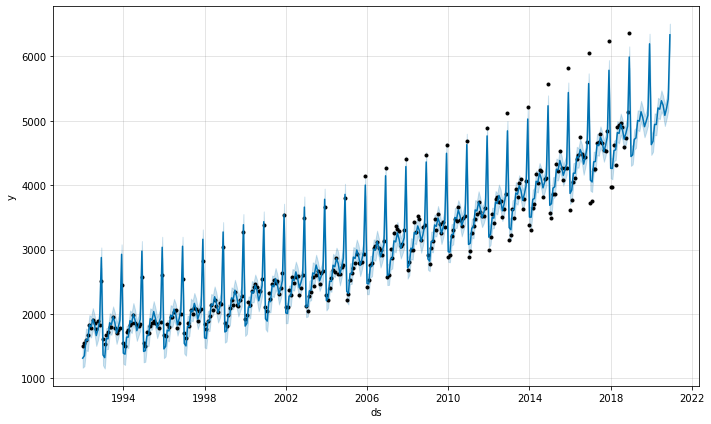

In [42]:
m.plot(forecast)
plt.xlim('2016-01-01','2021-01-01')

(528.0, 612.0)

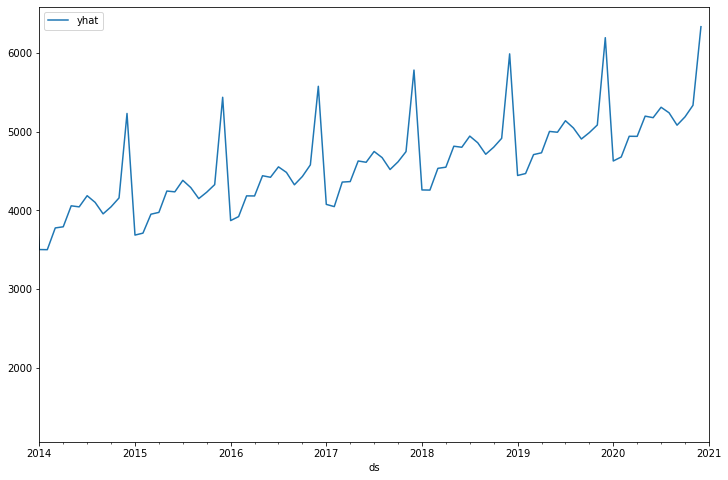

In [41]:
forecast.plot(x='ds',y='yhat',figsize=(12,8))
plt.xlim('2014-01-01','2021-01-01')

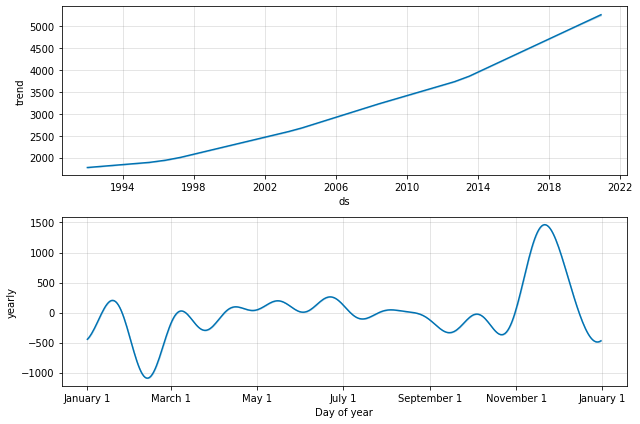

In [43]:
m.plot_components(forecast);